In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

In [2]:
data_frame = pd.read_csv('./logs/PPO/LunarLander-v2/run-2020-08-09-09-00-44-829898.csv')

In [56]:
data_frame

,num_episodes,ep_rew_mean,total timesteps,total_time,total_loss,entropy_loss,policy_gradient_loss,value_loss
0,7,-125.970789,1024,0.504771,NaN,NaN,NaN,NaN
1,18,-143.973328,2048,1.104226,3.022779,-1.181632,0.041741,2.992854
2,31,-141.509363,3072,1.704292,0.839931,-1.223720,-0.003684,0.855852
3,39,-137.807944,4096,2.294548,0.634678,-1.272294,0.001777,0.645624
4,47,-133.982771,5120,2.866804,0.354997,-1.259985,-0.015603,0.383199
...,...,...,...,...,...,...,...,...
335,1162,194.145167,344064,207.983756,0.000480,-0.683134,-0.000335,0.007647
336,1164,199.058499,345088,208.620902,0.045984,-0.703160,-0.002908,0.055924
337,1165,199.028921,346112,209.176002,0.039634,-0.823946,-0.003802,0.051676
338,1167,204.178334,347136,209.740239,0.025679,-0.562977,-0.002882,0.034191


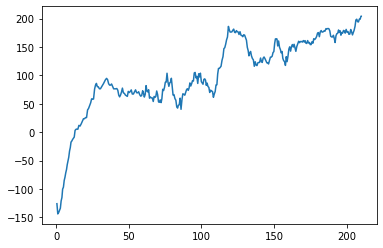

In [6]:
plt.plot(data_frame.total_time, data_frame.ep_rew_mean)

In [79]:
log_dir = os.getcwd() + '/logs/PPO'
ppo_df = pd.DataFrame()
for file in os.listdir(log_dir):
    for index, df_file in enumerate(os.listdir(log_dir + '/' + file)):
        df = pd.read_csv(log_dir + '/' + file + '/' + df_file)
        env_name = [str(file) for _ in range(len(df))]
        run = [index + 1 for _ in range(len(df))]
        df["env"] = env_name
        df["run"] = run
        ppo_df = pd.concat([ppo_df, df])
        
ppo_df['total_time'] = np.floor(ppo_df.total_time)

,total_time,ep_rew_mean
env,,
BipedalWalker-v3,268.577814,28.433025
InvertedDoublePendulumPyBulletEnv-v0,61.491379,3649.918812
InvertedPendulumPyBulletEnv-v0,76.176802,585.762357
InvertedPendulumSwingupPyBulletEnv-v0,170.019407,-277.892878
LunarLander-v2,119.223416,104.982901
MountainCarContinuous-v0,55.259323,-28.378086
ReacherPyBulletEnv-v0,26.806870,-15.866982


In [94]:
def get_dataframes(algorithm):
    assert algorithm in ['PPO', 'RND', 'ICM', 'ES']
    log_dir = os.getcwd() + '/logs/' + algorithm
    ppo_df = pd.DataFrame()
    for file in os.listdir(log_dir):
        for index, df_file in enumerate(os.listdir(log_dir + '/' + file)):
            df = pd.read_csv(log_dir + '/' + file + '/' + df_file)
            env_name = [str(file) for _ in range(len(df))]
            run = [index + 1 for _ in range(len(df))]
            df["env"] = env_name
            df["run"] = run
            ppo_df = pd.concat([ppo_df, df])

    ppo_df['total_time'] = np.floor(ppo_df.total_time)
    return ppo_df

In [ ]:
rnd_df = get_dataframes("RND")
rnd_df[['total_time', 'ep_rew_mean', 'run']].groupby(rnd_df['env']).aggregate({'total_time' : 'mean',
                                                                              'ep_rew_mean' : 'mean'})

In [ ]:
ppo_df[['total_time', 'ep_rew_mean', 'run']].groupby(ppo_df['env']).aggregate({'total_time' : 'mean',
                                                                              'ep_rew_mean' : 'mean'})

ppo_df[['total_time', 'ep_rew_mean', 'run']].groupby(ppo_df['env']).aggregate({'total_time' : 'mean',
                                                                              'ep_rew_mean' : 'mean'})

In [160]:
icm_df = get_dataframes("ICM")
bipedal_df = icm_df[icm_df['env'] == "InvertedDoublePendulumPyBulletEnv-v0"]
plot_data = icm_df[['total_time', 'ep_rew_mean', 'run', 'env']].groupby(['total_time', 'env']).aggregate({'ep_rew_mean':'mean'})
plot_data['total_time'] = plot_data.index.get_level_values(0)
plot_data['env'] = plot_data.index.get_level_values(1)

ep_rew_mean  total_time  \
total_time env                                                              
0.0        BipedalWalker-v3                       -111.507613         0.0   
           InvertedDoublePendulumPyBulletEnv-v0    223.951829         0.0   
           InvertedPendulumPyBulletEnv-v0           20.430105         0.0   
           InvertedPendulumSwingupPyBulletEnv-v0          NaN         0.0   
           LunarLander-v2                         -281.875120         0.0   
...                                                       ...         ...   
1076.0     BipedalWalker-v3                         33.197431      1076.0   
1077.0     BipedalWalker-v3                         74.911689      1077.0   
1079.0     BipedalWalker-v3                         54.646458      1079.0   
1081.0     BipedalWalker-v3                         46.954646      1081.0   
1082.0     BipedalWalker-v3                         63.516861      1082.0   

                                                                                    env  
total_time env                                                                           
0.0        BipedalWalker-v3                                            BipedalWalker-v3  
           InvertedDoublePendulumPyBulletEnv-v0    InvertedDoublePendulumPyBulletEnv-v0  
           InvertedPendulumPyBulletEnv-v0                InvertedPendulumPyBulletEnv-v0  
           InvertedPendulumSwingupPyBulletEnv-v0  InvertedPendulumSwingupPyBulletEnv-v0  
           LunarLander-v2                                                LunarLander-v2  
...                                                                                 ...  
1076.0     BipedalWalker-v3                                            BipedalWalker-v3  
1077.0     BipedalWalker-v3                                            BipedalWalker-v3  
1079.0     BipedalWalker-v3                                            BipedalWalker-v3  
1081.0     BipedalWalker-v3                                            BipedalWalker-v3  
1082.0     BipedalWalker-v3                                            BipedalWalker-v3  

[2844 rows x 3 columns]

In [ ]:
fig,a =  plt.subplots(2,2)
for i, env in enumerate(plot_data['env'].unique()):
    print(i)
    plt.subplot()
    temp = plot_data[plot_data['env'] == env]
    plt.plot(temp.total_time, temp.ep_rew_mean)

In [177]:
from es import *

In [274]:
class FeedForwardNetwork(object):
    def __init__(self, env, hidden_sizes):
        self.env = env
        self.action_space = self.env.action_space.__class__.__name__
        self.weights = []

        layer_sizes = [env.observation_space.shape[0], *hidden_sizes, self.num_actions]
        for index in range(len(layer_sizes)-1):
            self.weights.append(np.random.randn(layer_sizes[index], layer_sizes[index+1]))

    @property
    def num_actions(self):
        if self.action_space == "Discrete":
            return self.env.action_space.n
        else:
            return self.env.action_space.shape[0]

    def predict(self, inp):
        out = np.expand_dims(inp.flatten(), 0)
        for i in range(len(self.weights)-1):
            try:
                out = np.dot(out, self.weights[i])
                out = np.arctan(out)
            except:
                pass

        out = np.dot(out, self.weights[-1])
        out = self.get_action(out.astype(float))
        return out

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

    def save(self, filename='weights.pkl'):
        with open(filename, 'wb') as fp:
            pickle.dump(self.weights, fp)

    def load(self, filename='weights.pkl'):
        with open(filename, 'rb') as fp:
            self.weights = pickle.load(fp)
    
    def softmax(self, logits):
        logits = logits - np.max(logits)
        return np.exp(logits)/np.sum(np.exp(logits))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def discrete_action(self, n_actions, logits):
        return np.random.choice(np.arange(n_actions), p=self.softmax(logits).squeeze()).astype(int)

    def continuous_action(self, logits):
        mean = logits
        sd = np.ones(shape=mean.shape)
        return np.random.normal(mean, sd)
        #return mean.squeeze()

    def get_action(self, logits):
        if self.action_space == "Discrete":
            return self.discrete_action(self.env.action_space.n, logits)
        else:
            return self.continuous_action(logits)

In [277]:
import itertools
SIGMA = 0.1
def add_jitter(population):
    for model in population:
        weights = model.get_weights()
        for i, w in enumerate(weights):
            jittered = w * SIGMA
            weights[i] = jittered
            
    return population

def evaluate(model, env):
        obs = env.reset()
        total_r = 0
        total_steps = 0
        for t in itertools.count():
            actions = model.predict(obs)
            obs, reward, done, info = env.step(actions)
            total_r += reward
            if done:
                total_steps = t
                break
        return total_r

def get_rewards(population):
    rewards = []
    population = add_jitter(population)
    for p in population:
        rewards.append(evaluate(p, env))
    return rewards

def rank_highest(population, rewards):
    return population[np.argmax(rewards)]
    
def make_population(model, pop_size):
    models = [model for _ in range(pop_size)]
    return add_jitter(models)
        

In [278]:
env = gym.make("CartPole-v1")
model = FeedForwardNetwork(env, hidden_sizes=[16, 16])
for i in range(1000):
    population = make_population(model, 10)
    rewards = get_rewards(population)
    model = rank_highest(population, rewards)  
    if i % 100 == 0:
        print(np.mean(rewards))
    

20.0
23.4
39.6
21.1
28.3
24.6
18.8
18.3
21.2
21.9


In [285]:
torch.full((4,), 2 * 2)

..\aten\src\ATen\native\TensorFactories.cpp:361: UserWarning: Deprecation warning: In a future PyTorch release torch.full will no longer return tensors of floating dtype by default. Instead, a bool fill_value will return a tensor of torch.bool dtype, and an integral fill_value will return a tensor of torch.long dtype. Set the optional `dtype` or `out` arguments to suppress this warning.


tensor([4., 4., 4., 4.])